https://www.youtube.com/watch?v=lpU3PGyDKQ4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,LSTM
from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler

In [2]:
x_train=pd.read_csv("x_train.csv").values.flatten()
y_train=pd.read_csv("y_train.csv").values.flatten()
x_test=pd.read_csv("x_test.csv").values.flatten()

x_train.shape,y_train.shape,x_test.shape

((1257,), (1257,), (19,))

In [3]:
#minmaxscaling works with 2D data only

x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)

In [4]:
scaler=MinMaxScaler((0,1))
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)        
y_train=scaler.transform(y_train)

In [5]:
x_train=x_train.flatten()
y_train=y_train.flatten()
x_test=x_test.flatten()

In [6]:
win_size=50

In [7]:
train_data=[]
train_labels=[]

for end in range(win_size,x_train.shape[0]+1):
    
    beg=end-win_size
    
    train_data.append(x_train[beg:end])
    train_labels.append(y_train[end-1])
    
train_data=np.array(train_data)
train_labels=np.array(train_labels)

print(train_data.shape)
print(train_labels.shape)

print()

print(train_data)

print()

print(train_labels)

(1208, 50)
(1208,)

[[0.09640129 0.09834351 0.09251685 ... 0.03951669 0.04960128 0.05419538]
 [0.09834351 0.09251685 0.08881917 ... 0.04960128 0.05419538 0.05486769]
 [0.09251685 0.08881917 0.07671765 ... 0.05419538 0.05486769 0.05710871]
 ...
 [0.94242441 0.9718565  0.97744038 ... 0.95637477 0.95529161 0.96485331]
 [0.9718565  0.97744038 0.97626384 ... 0.95529161 0.96485331 0.95807422]
 [0.97744038 0.97626384 0.96791604 ... 0.96485331 0.95807422 0.94257381]]

[0.05486769 0.05710871 0.06767886 ... 0.95807422 0.94257381 0.93669113]


In [8]:
test_data=[]

beg=x_train.shape[0]-win_size
end=0

while end<x_test.shape[0]+1:
    
    combined=np.hstack((x_train[beg:],x_test[:end]))
    test_data.append(combined)
    
    beg+=1
    end+=1
    
test_data=np.array(test_data)
test_data.shape

(20, 50)

In [9]:
train_data=train_data.reshape(-1,win_size,1)
test_data=test_data.reshape(-1,win_size,1)

train_data.shape,test_data.shape,train_labels.shape

((1208, 50, 1), (20, 50, 1), (1208,))

In [10]:
model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(train_data.shape[1],train_data.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 96)            37632     
_________________________________________________________________
dropout (Dropout)            (None, 50, 96)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 96)                7

In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
hist=model.fit(train_data,train_labels,batch_size=32,epochs=400,verbose=2)

Train on 1208 samples
Epoch 1/400
1208/1208 - 23s - loss: 0.0395
Epoch 2/400
1208/1208 - 7s - loss: 0.0040
Epoch 3/400
1208/1208 - 8s - loss: 0.0040
Epoch 4/400
1208/1208 - 7s - loss: 0.0037
Epoch 5/400
1208/1208 - 8s - loss: 0.0034
Epoch 6/400
1208/1208 - 7s - loss: 0.0034
Epoch 7/400
1208/1208 - 7s - loss: 0.0040
Epoch 8/400
1208/1208 - 7s - loss: 0.0034
Epoch 9/400
1208/1208 - 7s - loss: 0.0031
Epoch 10/400
1208/1208 - 7s - loss: 0.0027
Epoch 11/400
1208/1208 - 8s - loss: 0.0030
Epoch 12/400
1208/1208 - 8s - loss: 0.0031
Epoch 13/400
1208/1208 - 8s - loss: 0.0028
Epoch 14/400
1208/1208 - 13s - loss: 0.0027
Epoch 15/400
1208/1208 - 13s - loss: 0.0029
Epoch 16/400
1208/1208 - 14s - loss: 0.0028
Epoch 17/400
1208/1208 - 14s - loss: 0.0026
Epoch 18/400
1208/1208 - 10s - loss: 0.0024
Epoch 19/400
1208/1208 - 8s - loss: 0.0028
Epoch 20/400
1208/1208 - 8s - loss: 0.0026
Epoch 21/400
1208/1208 - 8s - loss: 0.0025
Epoch 22/400
1208/1208 - 13s - loss: 0.0024
Epoch 23/400
1208/1208 - 13s - los

Epoch 184/400
1208/1208 - 8s - loss: 8.0165e-04
Epoch 185/400
1208/1208 - 8s - loss: 7.4488e-04
Epoch 186/400
1208/1208 - 8s - loss: 8.1080e-04
Epoch 187/400
1208/1208 - 8s - loss: 8.4346e-04
Epoch 188/400
1208/1208 - 9s - loss: 7.5686e-04
Epoch 189/400
1208/1208 - 8s - loss: 9.7865e-04
Epoch 190/400
1208/1208 - 8s - loss: 8.4673e-04
Epoch 191/400
1208/1208 - 8s - loss: 7.4420e-04
Epoch 192/400
1208/1208 - 9s - loss: 6.9897e-04
Epoch 193/400
1208/1208 - 6s - loss: 7.6677e-04
Epoch 194/400
1208/1208 - 6s - loss: 7.7591e-04
Epoch 195/400
1208/1208 - 6s - loss: 7.8444e-04
Epoch 196/400
1208/1208 - 5s - loss: 8.1978e-04
Epoch 197/400
1208/1208 - 5s - loss: 8.4487e-04
Epoch 198/400
1208/1208 - 6s - loss: 7.0008e-04
Epoch 199/400
1208/1208 - 6s - loss: 7.6859e-04
Epoch 200/400
1208/1208 - 9s - loss: 7.5821e-04
Epoch 201/400
1208/1208 - 10s - loss: 7.9991e-04
Epoch 202/400
1208/1208 - 12s - loss: 7.4583e-04
Epoch 203/400
1208/1208 - 7s - loss: 7.2878e-04
Epoch 204/400
1208/1208 - 7s - loss: 7

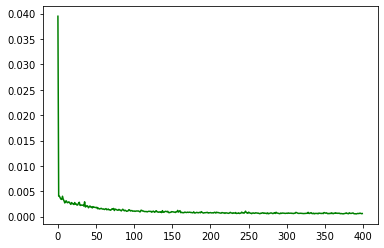

In [14]:
plt.plot(hist.history['loss'],c='g')

plt.show()

In [15]:
pred=model.predict(test_data)
pred=scaler.inverse_transform(pred)
pred

array([[788.4259 ],
       [792.4944 ],
       [793.53955],
       [795.65216],
       [804.4841 ],
       [805.48956],
       [805.2743 ],
       [805.19525],
       [805.43427],
       [808.3989 ],
       [804.91394],
       [804.8301 ],
       [807.2955 ],
       [805.2328 ],
       [814.3056 ],
       [817.24384],
       [823.59357],
       [825.1882 ],
       [828.5074 ],
       [807.17883]], dtype=float32)

In [16]:
pred=pred.flatten()
pred.shape

(20,)

In [17]:
d={'High':pred}

df=pd.DataFrame(d)
df.to_csv("submission.csv",index=False)

# Plotting the Stock Prices:

In [18]:
train_pred=scaler.inverse_transform(model.predict(train_data))
train_pred=train_pred.flatten()
train_pred.shape

(1208,)

In [19]:
train_labels=train_labels.reshape(-1,1)
train_labels=scaler.inverse_transform(train_labels)
train_labels=train_labels.flatten()

train_labels.shape

(1208,)

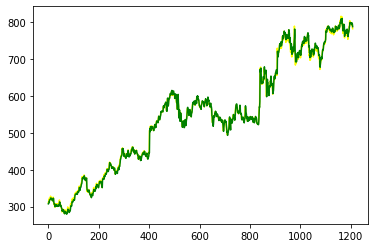

In [20]:
index=np.arange(train_pred.shape[0])

plt.plot(index,train_labels,c='yellow')
plt.plot(index,train_pred,c='green')

plt.show()

In [21]:
pred

array([788.4259 , 792.4944 , 793.53955, 795.65216, 804.4841 , 805.48956,
       805.2743 , 805.19525, 805.43427, 808.3989 , 804.91394, 804.8301 ,
       807.2955 , 805.2328 , 814.3056 , 817.24384, 823.59357, 825.1882 ,
       828.5074 , 807.17883], dtype=float32)

In [22]:
x_test=x_test.reshape(-1,1)
x_test=scaler.inverse_transform(x_test)

In [23]:
x_test=x_test.flatten()
x_test

array([789.63, 791.34, 794.48, 807.9 , 809.97, 809.13, 808.15, 807.39,
       811.22, 807.14, 806.21, 809.48, 806.91, 820.87, 825.9 , 835.77,
       838.  , 841.95, 815.84])

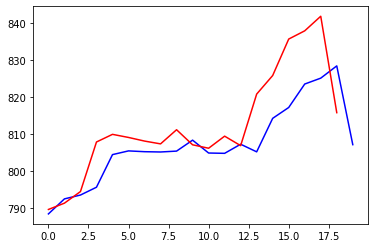

In [24]:
index1=np.arange(pred.shape[0])
index2=np.arange(x_test.shape[0])

plt.plot(index1,pred,c='blue')
plt.plot(index2,x_test,c='red')

plt.show()